<h1 align="center">EQE512 MATRIX METHODS IN STRUCTURAL ANALYSIS 
<br>
<br>
Week 03
<br>
<br>
Truss Element & System - Stifness Matrix</h1> 

<h3 align="center">Dr. Ahmet Anıl Dindar (adindar@gtu.edu.tr)</h3> 
<h4 align="center">2021 Fall  </h4> 

**This week :**

1. Truss systems explanation

2. Local & global coordinates 

3. Truss member stiffness

    3.1. Local coordinates

    3.2. Global coordinates

4. Assembling the system stiffness matrix

---


# Truss systems explanation

_A truss is a structure composed of sleder members joined together at their end points._

![](./figures/1-EQE512-TrussExample.png)

---

# Local & global coordinates 

<img src = "./figures/2-Global-local-coordinates.png" width = "400">

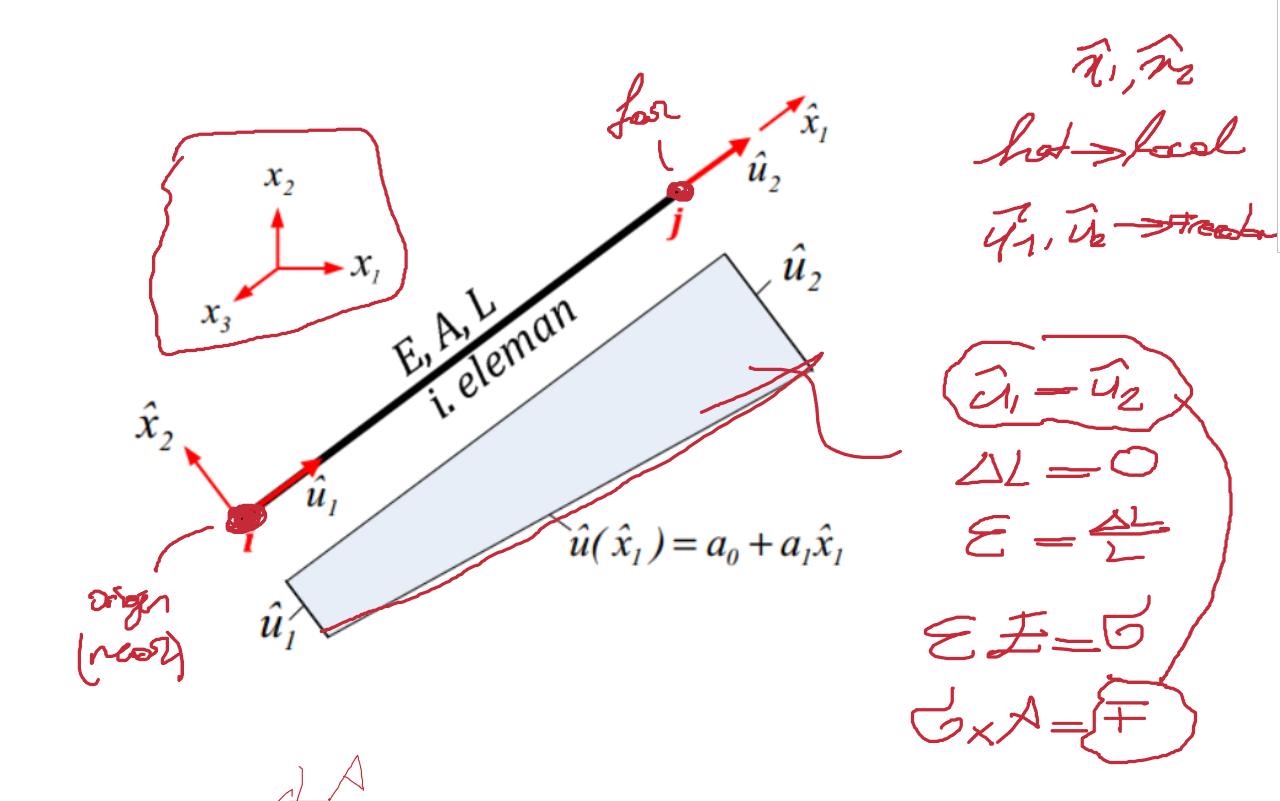

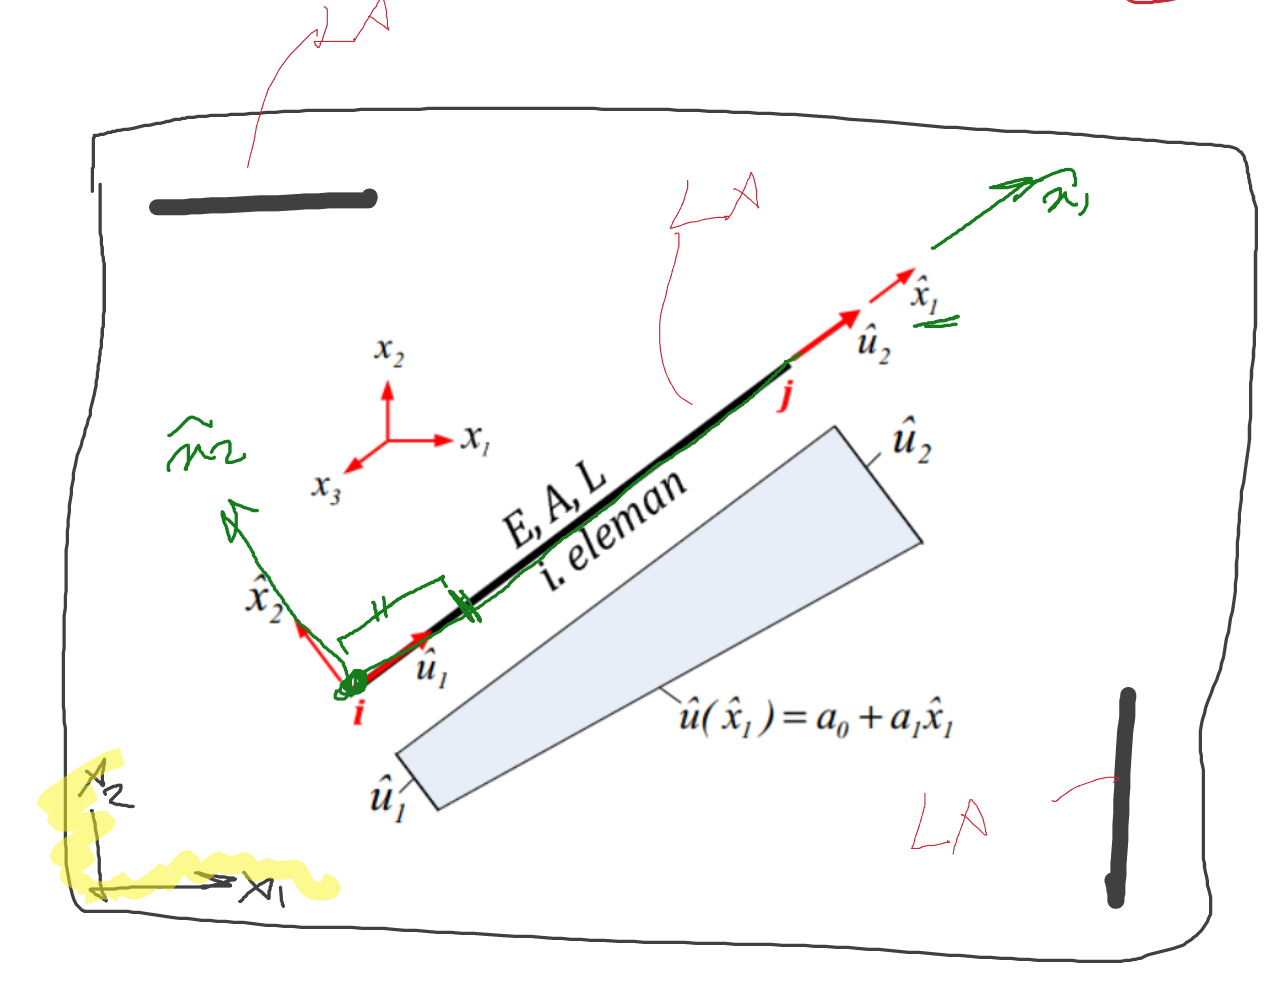

## Transformation is required

<img src = "./figures/3-Global-local-coordinates-transformation.png" width = "400">

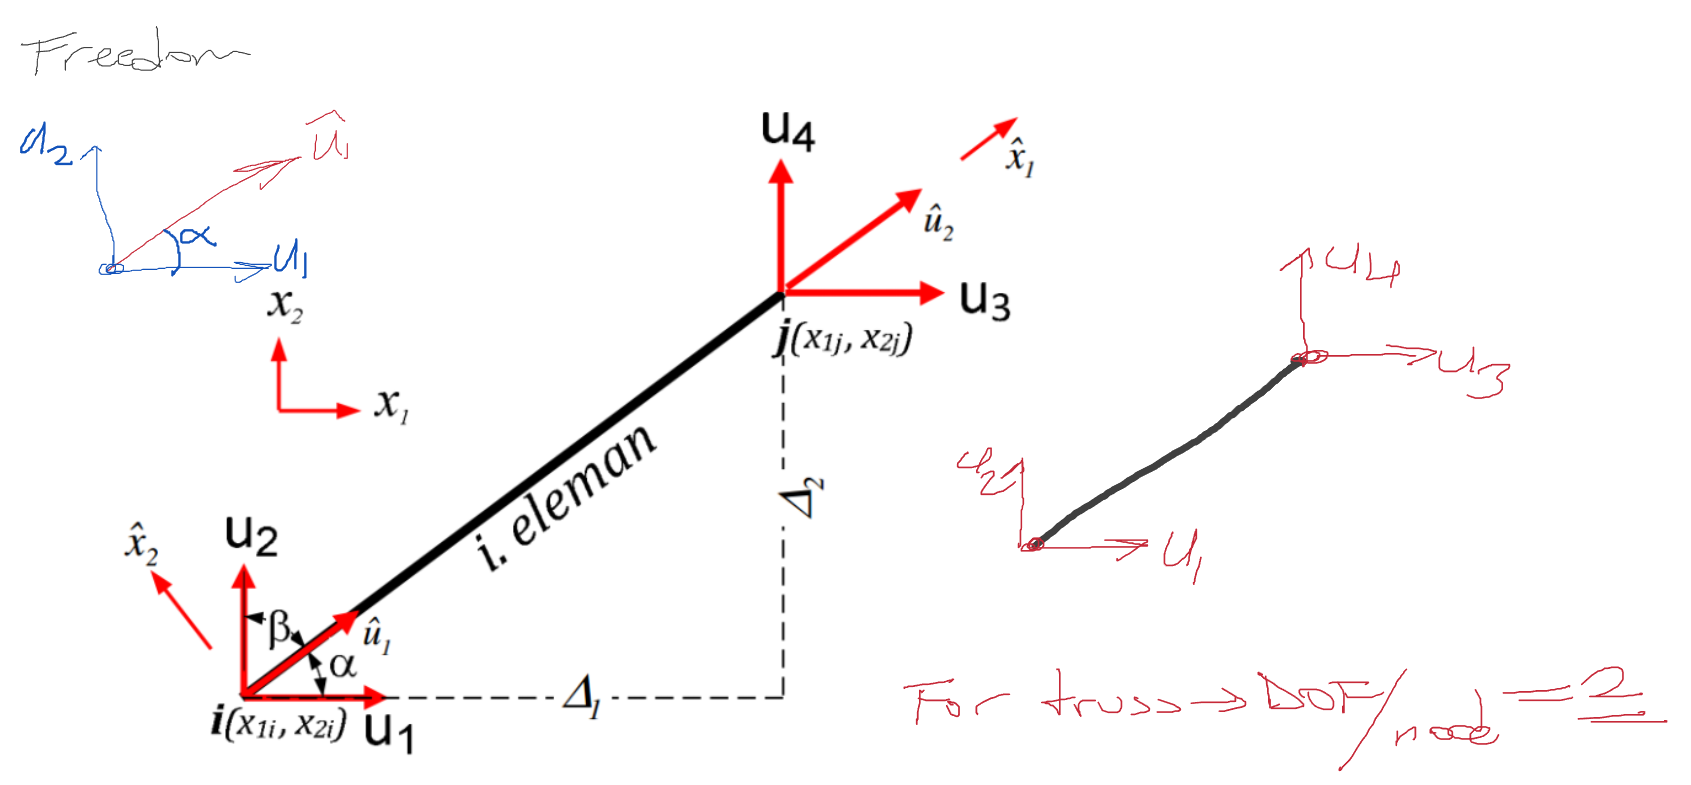

**The formula is**

Denote as 

$$\Delta_1 = x_{1j} - x_{1i} $$ and $$\Delta_2 = x_{2j} - x_{2i} $$


$$ L = \sqrt{{\Delta_1}^2 + {\Delta_2}^2} $$ and $$ Cos\alpha = \frac{\Delta_1}{L} $$ , $$Cos\beta = \frac{\Delta_2}{L}$$

Place in to 

$$\hat{u}_1 = u_1 Cos\alpha + u_2 Cos\beta = \frac{\Delta_1}{L}u_1 + \frac{\Delta_2}{L}u_2 $$


$$\hat{u}_2 = u_3 Cos\alpha + u_4 Cos\beta = \frac{\Delta_1}{L}u_3 + \frac{\Delta_2}{L}u_4 $$

Transformaiton Matrix is : 
$$ T= \begin{bmatrix} \frac{\Delta_1}{L} & \frac{\Delta_2}{L}  & 0 & 0  \\ 0 & 0 & 
\frac{\Delta_1}{L} & \frac{\Delta_2}{L} \end{bmatrix} $$

Finally  ; 
$$ \begin{bmatrix} \hat{u}_1 \\ \hat{u}_2 \end{bmatrix} = \begin{bmatrix} \frac{\Delta_1}{L} & \frac{\Delta_2}{L}  & 0 & 0  \\ 0 & 0 & 
\frac{\Delta_1}{L} & \frac{\Delta_2}{L}  \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4\end{bmatrix}  $$

Global to local coordinate transformation
$$\hat{u}^i = T^i u^i$$


From local to global  coordinate transformation
$$ {T^i}^T \times \hat{u}^i = {T^i}^T \times T^i u^i$$
$$ {T^i}^T \times \hat{u}^i = [{T^i}^T \times {T^i}] u^i$$
$$ {T^i}^T \times \hat{u}^i =  u^i$$

# Truss member stiffness


Let's think the systems

## Local coordinates


$$ \hat{k}^i = \frac{EA}{L} \begin{bmatrix}1 & -1 \\ -1 & 1 \end{bmatrix}$$

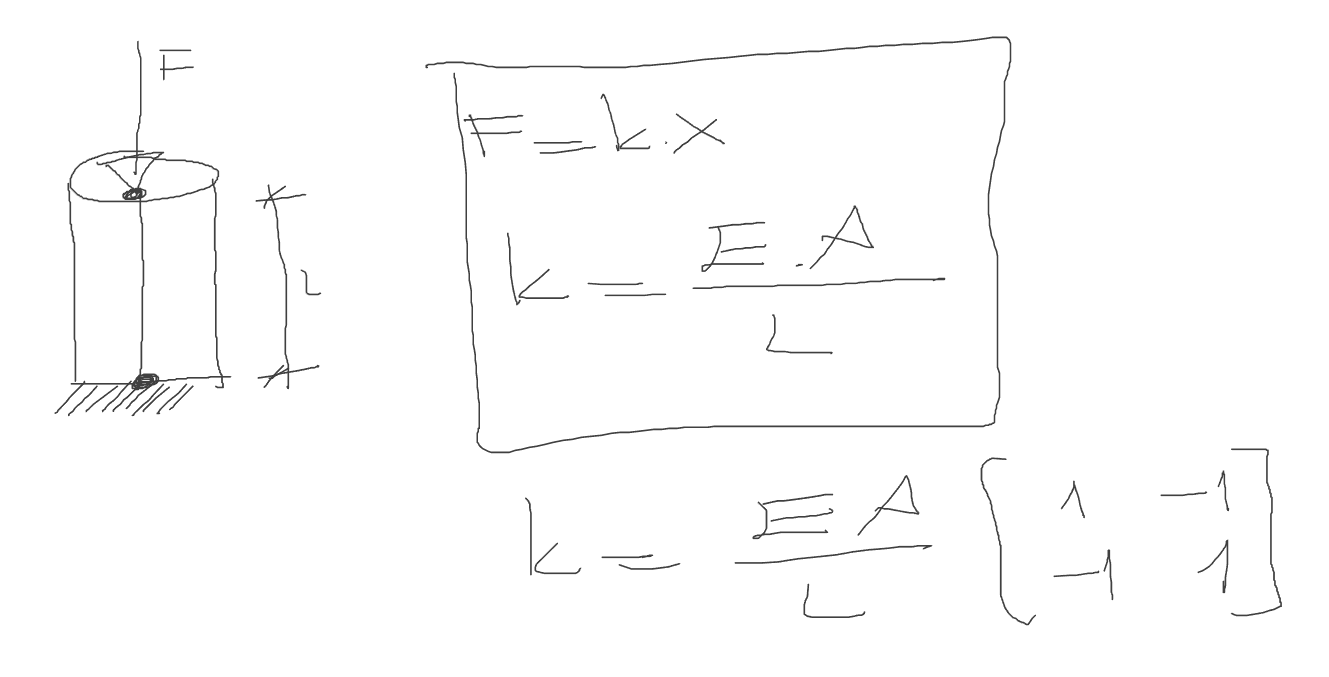

## Global coordinates
Remember the relation between local and global terms

$$ k^i = (T^i) \hat{k}^i T^i$$

Remember the transformation matrix;

$$ T^i = \begin{bmatrix} \frac{\Delta_1}{L} & \frac{\Delta_2}{L}  & 0 & 0  \\ 0 & 0 & 
\frac{\Delta_1}{L} & \frac{\Delta_2}{L}  \end{bmatrix}$$


Stiffness matrix in local coordinates;

$$ \hat{k}^i = \frac{EA}{L} \begin{bmatrix}1 & -1 \\ -1 & 1 \end{bmatrix} $$


Remember the denoted terms;
$$ c_1 = \frac{\Delta_1}{L} {\quad,\quad} c_2 = \frac{\Delta_2}{L}$$


Place all above into place; 
$$ k^i = \begin{bmatrix} c_1 & 0 \\ c_2 & 0 \\ 0 & c_1 \\ 0 & c_2\end{bmatrix} \frac{EA}{L} \begin{bmatrix}1 & -1 \\ -1 & 1 \end{bmatrix} = \frac{EA}{L} \begin{bmatrix} c_1^2 & c_1c_2& -c_1^2 & -c_1c_2 \\ c_1c_2 & c_2^2& -c_1c_2 & -c_22  \\ ^-c_1^2 & c_1c_2& c_1^2 & c_1c_2  \\ -c_1c_2 & -c_2^2& -_1c_2 & c_2^2 \end{bmatrix} $$


Stiffness matrix for a truss member in global coordinates is given as below: 

$$ k^i = \frac{EA}{L} \begin{bmatrix} c_1^2 & c_1c_2& -c_1^2 & -c_1c_2 \\ c_1c_2 & c_2^2& -c_1c_2 & -c_22  \\ ^-c_1^2 & c_1c_2& c_1^2 & c_1c_2  \\ -c_1c_2 & -c_2^2& -_1c_2 & c_2^2\end{bmatrix} $$

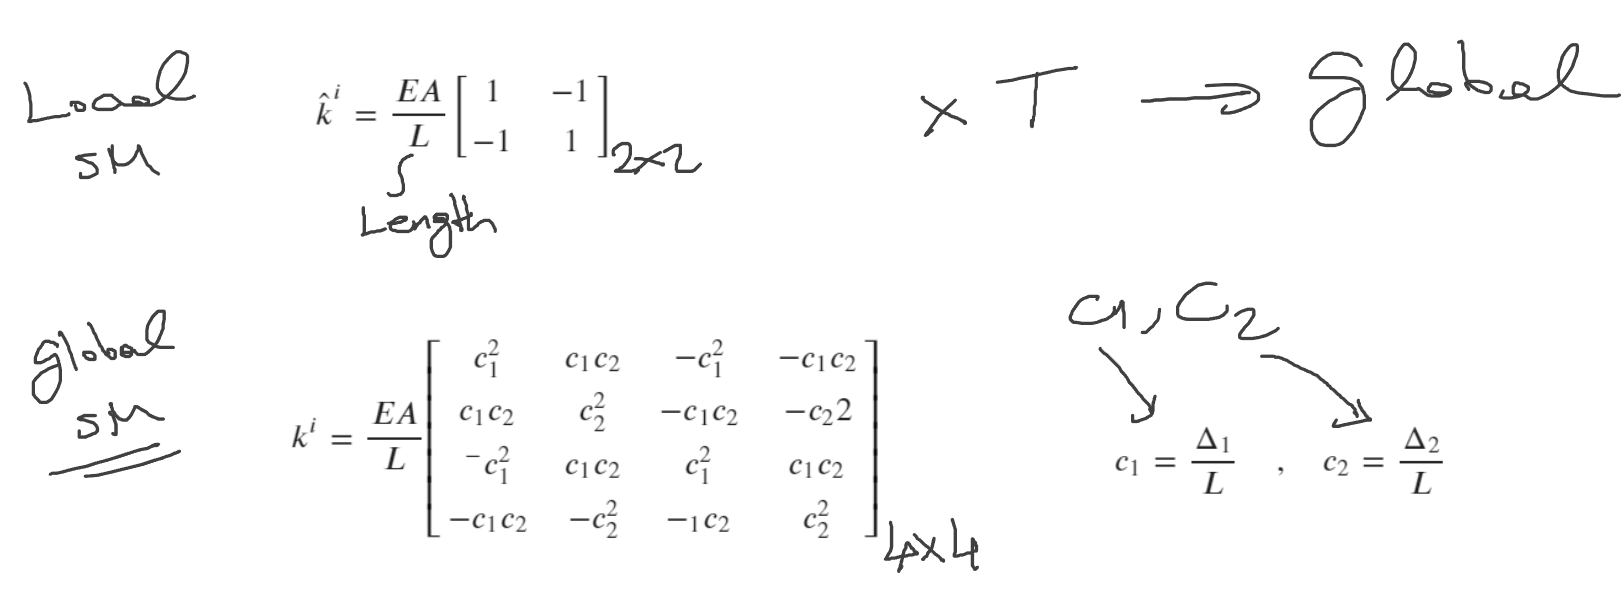

<font color = "red" > _Can you code the local and global truss member stiffness functions in Python?_</font>

---
Ten minutes break 

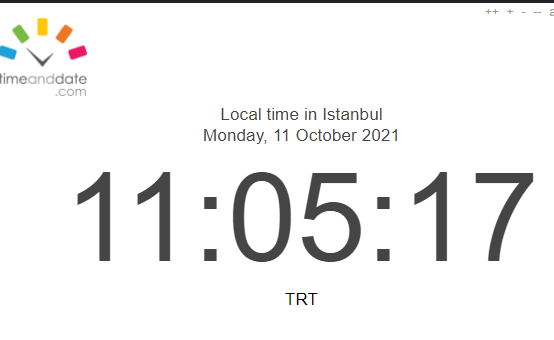

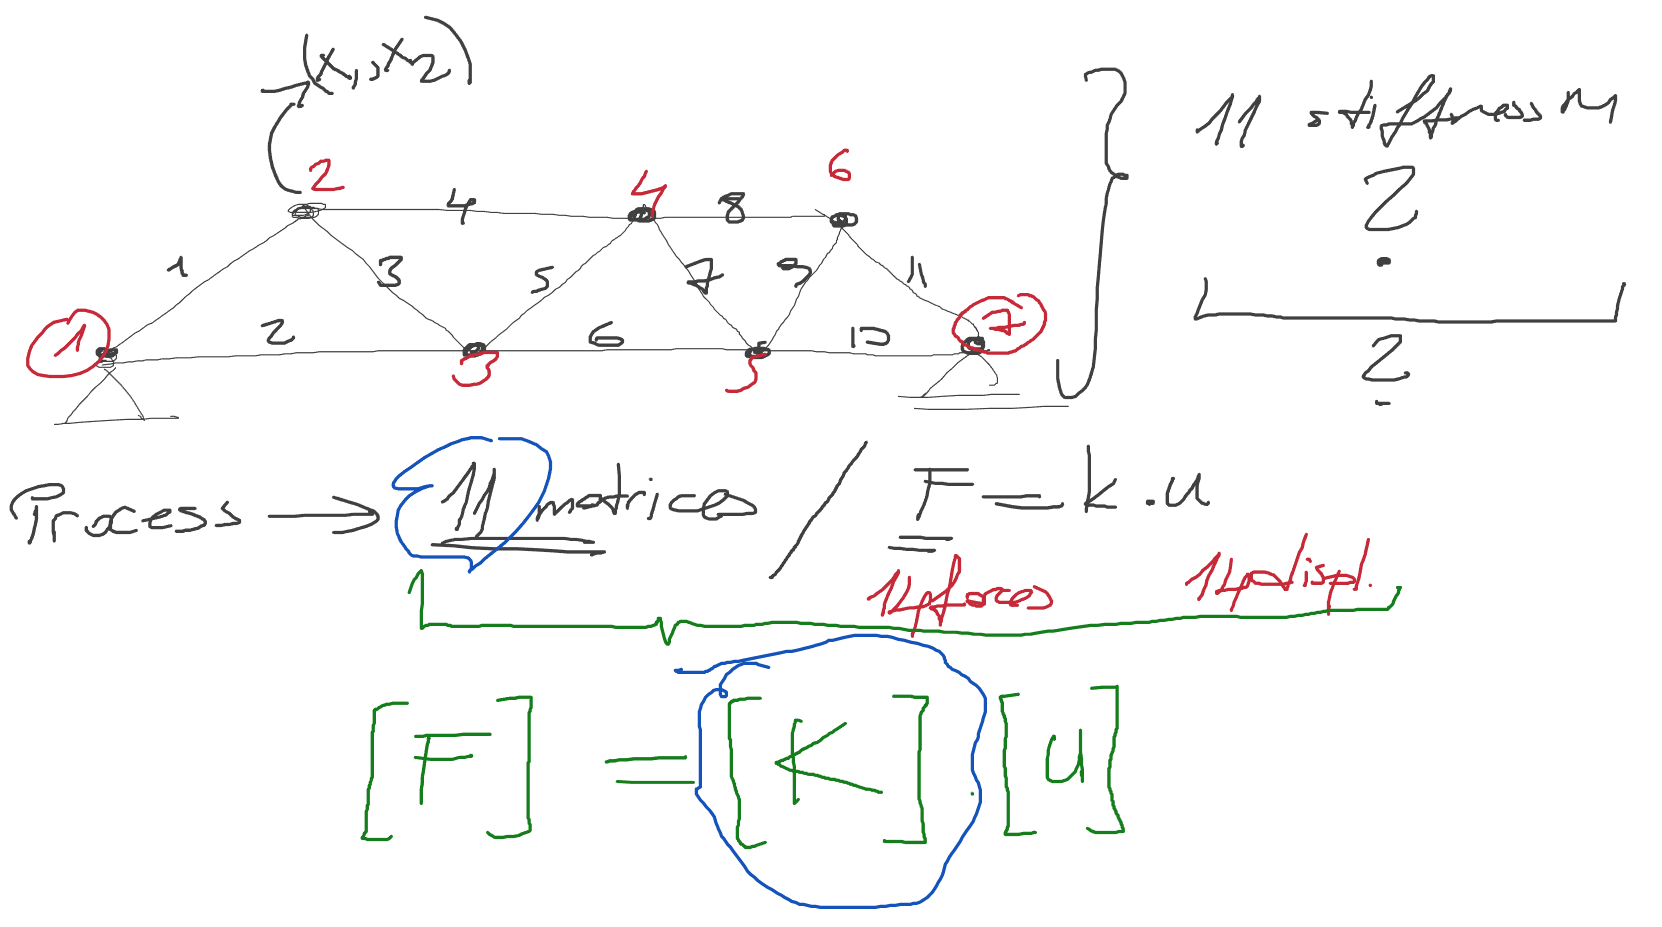

---
---
# Assembling the system stiffness matrix

![](figures/6-System-Stiffness-Assembly.png)

![](figures/6b-System-Stiffness-Assembly.png)

![](figures/6c-System-Stiffness-Assembly.png)



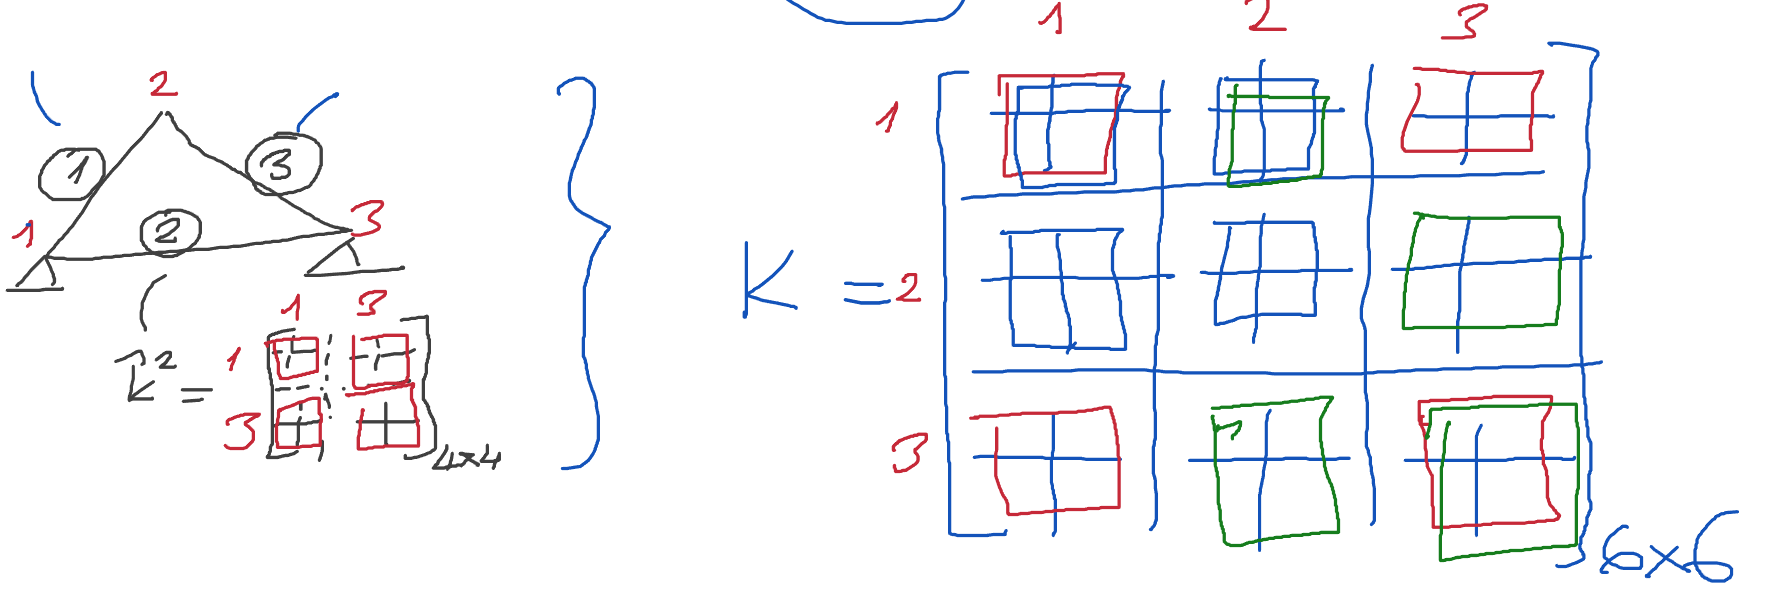

---

## Example

For the given Truss system, determine the followings
- Nodal displacements
- Support reactions
- Member forces
- Member deformations
- Member Stresses
- Deformed shape of the system

Material is steel (E=210GPa).


<img src="figures/1-EQE512-TrussExample_1.png" width = "400">


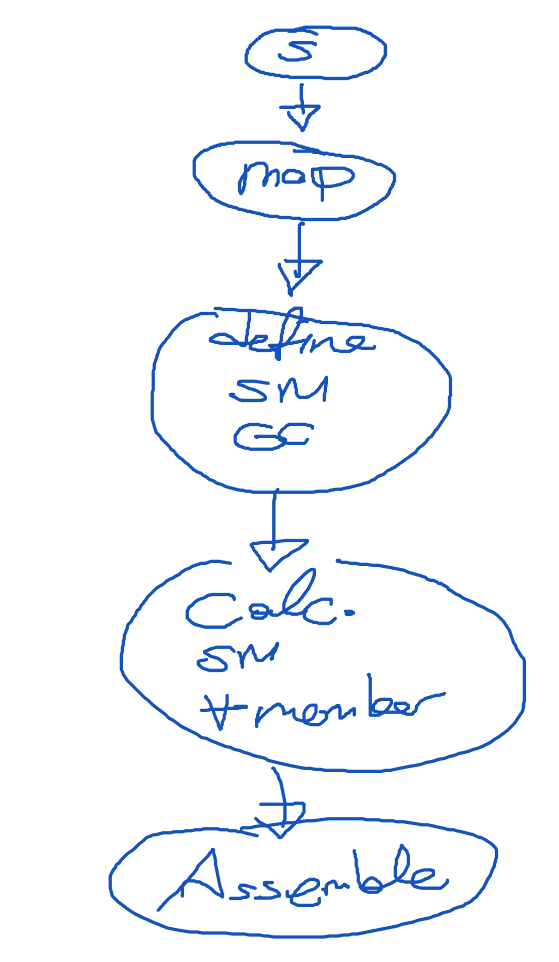

First step is mapping (numbering the nodes & members)
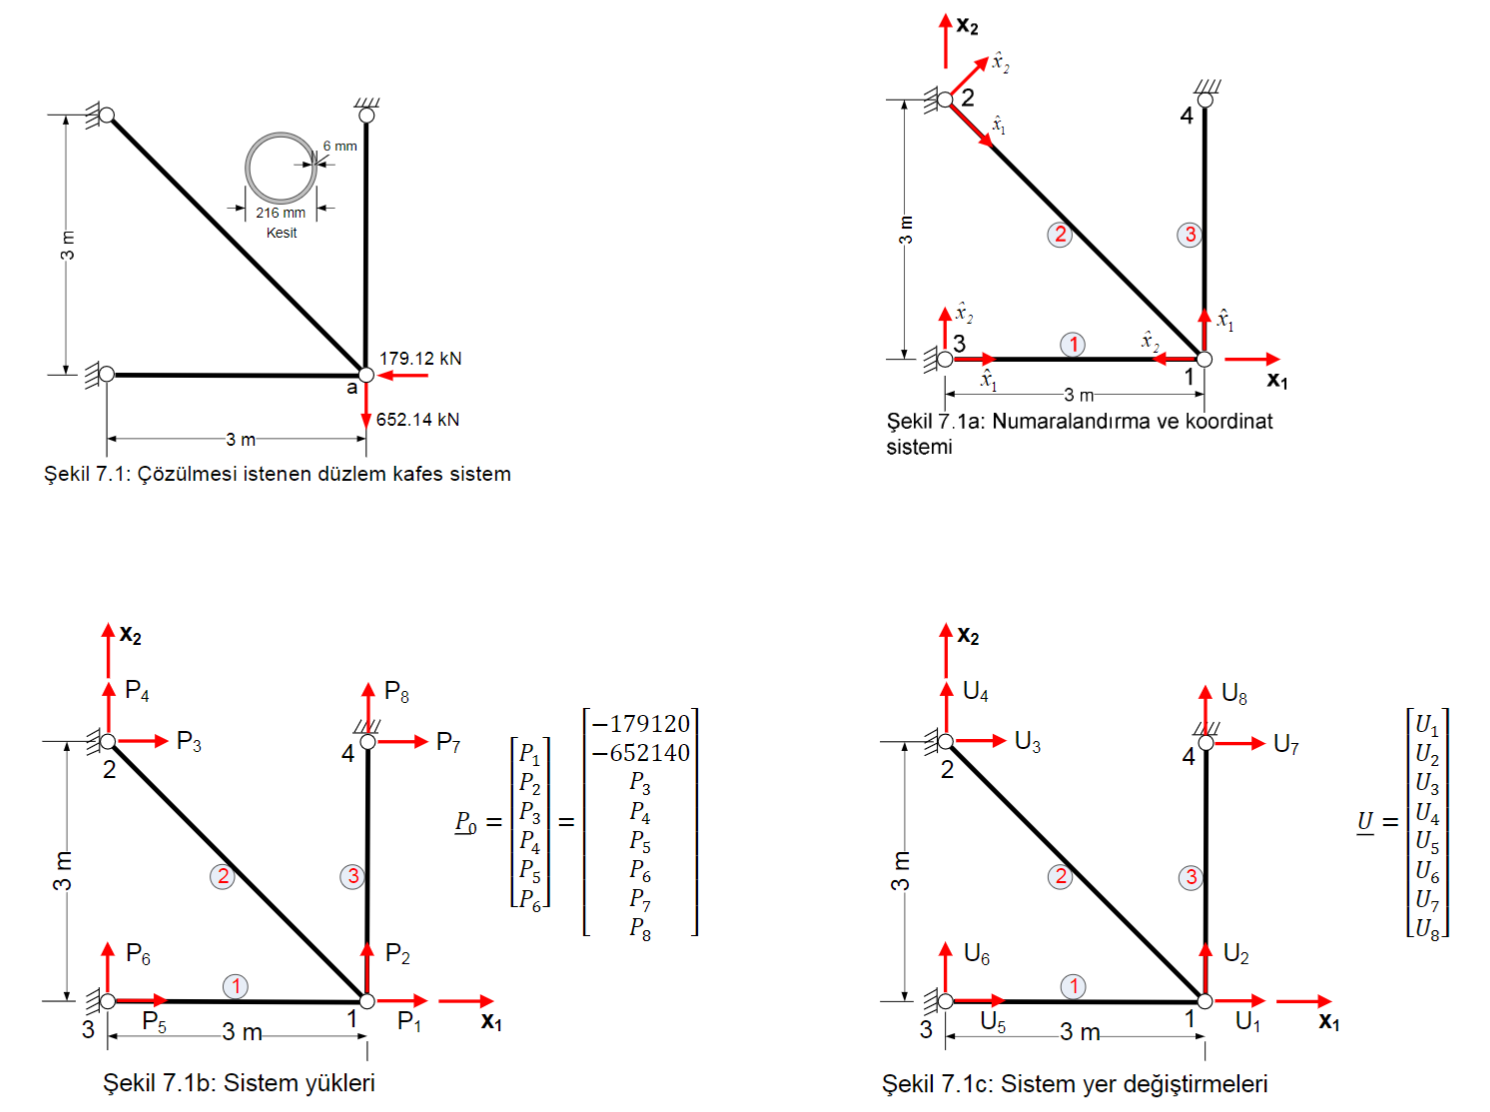

---

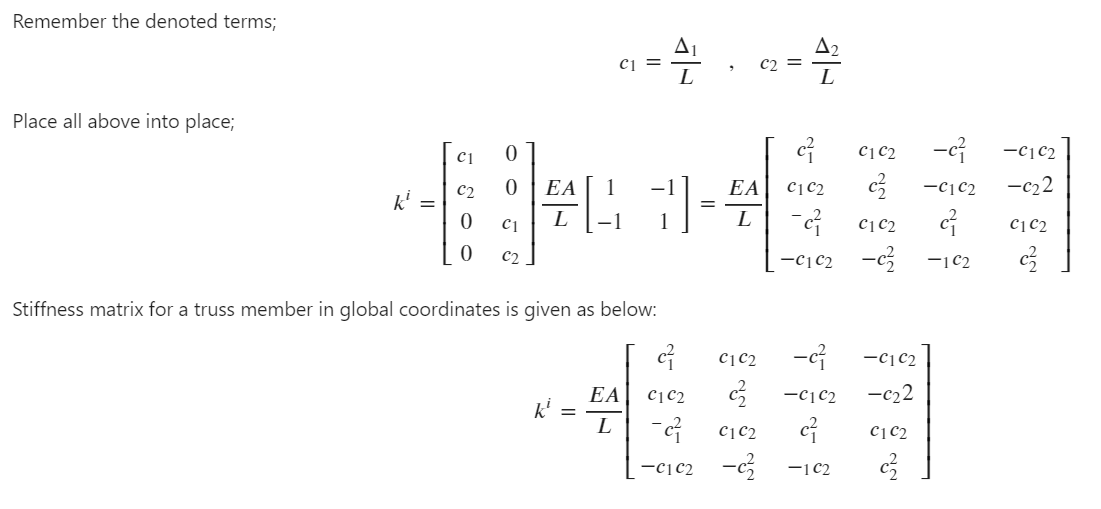

In [8]:
def aad_func( a ,b ): 
    c = a+ b
    print( f"{a} + {b} = {c}")
    return( c )

In [10]:
result = aad_func( 4 ,5)

4 + 5 = 9


In [11]:
result 

9

In [12]:
import numpy as np
def member_stiffness_creator(member_props) :
    """
    E: modulus of elasticiy
    A: Area 
    Joint I
    Joint J
    Return 
    k_member    
    """
    
    delta_1 = member_props["jointJ"][0] - member_props["jointI"][0] 
    delta_2 = member_props["jointJ"][1] - member_props["jointI"][1] 

    length = (delta_1**2 + delta_2**2)**.5

    c1 = delta_1 / length
    c2 = delta_2 / length

    a = c1**2
    b = c1*c2
    c = c2**2
    
    K = member_props["E"]*member_props["A"]/length

    K2 = np.array([[ a , b , -a , -b] , 
             [ b , c , -b , -c],
             [-a , -b , a , b ],
             [-b , -c , b , c ]])

    K_mem = K * K2
    return( K_mem )

In [13]:
member_1 = {"E": 30000 , "A" : 100 , 
                "jointI":[0,0] , 
                "jointJ":[300,400]}

In [14]:
member_1

{'E': 30000, 'A': 100, 'jointI': [0, 0], 'jointJ': [300, 400]}

In [19]:
k1= member_stiffness_creator( member_1 )

In [16]:
member_2 = {"E": 30000 , "A" : 100 , 
                "jointI":[300,400] , 
                "jointJ":[600,300]}

In [17]:
k2= member_stiffness_creator( member_2 )
print( k2 )

[[ 8538.14968245 -2846.04989415 -8538.14968245  2846.04989415]
 [-2846.04989415   948.68329805  2846.04989415  -948.68329805]
 [-8538.14968245  2846.04989415  8538.14968245 -2846.04989415]
 [ 2846.04989415  -948.68329805 -2846.04989415   948.68329805]]


In [20]:
k1 , k2

(array([[ 2160.,  2880., -2160., -2880.],
        [ 2880.,  3840., -2880., -3840.],
        [-2160., -2880.,  2160.,  2880.],
        [-2880., -3840.,  2880.,  3840.]]),
 array([[ 8538.14968245, -2846.04989415, -8538.14968245,  2846.04989415],
        [-2846.04989415,   948.68329805,  2846.04989415,  -948.68329805],
        [-8538.14968245,  2846.04989415,  8538.14968245, -2846.04989415],
        [ 2846.04989415,  -948.68329805, -2846.04989415,   948.68329805]]))

Beyond this point, 

1- you should get the member stiffness matrices into the system stiffness matrices.

2- Apply it to the example, above. 

3- Obtain the system stiffness matrix

4- Compare your matrix with the one given Topcu's book, below. 

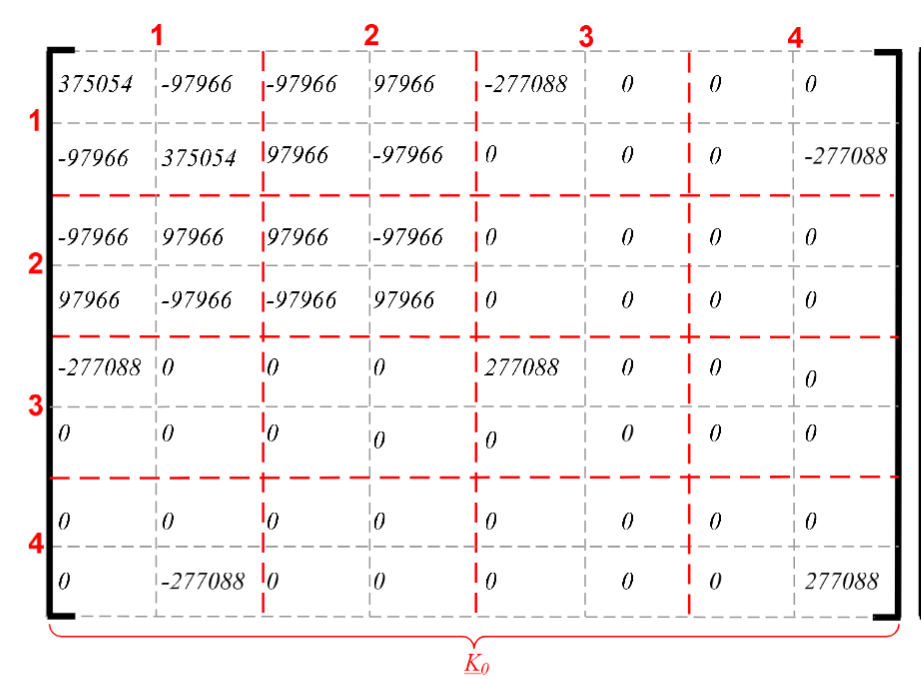

Once you validate yourself, you are ready to go for Assignment #2 next week. 

---

**NEXT WEEK**

<table >
<tr>
<td>
<img src="http://worshiphousemedia.s3.amazonaws.com/images/main/s/st/bnt/st/seeyounextweek1.jpg" width="50%" >
</td>
<td align="left">
The topics for the next week 
<br><br>
"Beam Elemnt- w/ & w/o Loads"
<br>
</td>
</tr>
</table>